In [2]:
#задание 1
import pandas as pd
import numpy as np

url = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/' \
      'Red-Wine-Quality/master/winequality-red.csv')
alcohol = pd.DataFrame(url)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)


class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)

    def feedforward(self, x):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot (self.layer1, self.weights2))

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) *
               sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) *
               sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        self.weights1 += d_weights1
        self.weights2 += d_weights2

x = np.array([3, 2])
network = NeuralNetwork(alcohol, alcohol)
print(network.feedforward(x))

None


In [7]:
#задание 2
import math as mth

def tanhens(x):
    return mth.tanh(x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot (self .weights, inputs) + self.bias
        return tanhens(total)


class OurNeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0

        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7595094447988621


Dataset sizes: (178, 13) (178,) 

Dataset sizes:  (150, 4) (150,) 

Train/Test sizes :  (142, 13) (36, 13) (142,) (36,) 

[2 0 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 0 2 2 0 2 2 0 2 0 0 0 0 0 0 2 0 2 0 2] 

[1 0 1 2 2 0 1 1 1 0 1 1 0 0 2 1 2 1 1 2 0 2 1 2 1 0 2 1 0 0 0 2 0 1 0 2] 

Test Accuracy: 0.528 

Training Accuracy: 0.500 

[[12  0  0]
 [ 4  0 10]
 [ 3  0  7]] 

Loss:  3.119550851948243 

Number of Coefs:  2 

Number of Intercepts:  2 

Number of Iterations for Which Estimator Ran:  19 

Name of Output Layer Activation Function:  softmax 

Train/Test Sizes:  (120, 4) (30, 4) (120,) (30,) 

[ 1.45962735  1.8143394   1.94966268  1.13466698 -0.12784248  1.53396682
  1.20542449 -0.06839022 -0.0332407   1.25863413] 

[1 2 2 1 0 2 1 0 0 1] 

Test R^2 Score: 0.933 

Training R^2 Score: 0.928 

Loss:  0.02293682943536234 

Number of Coefs:  2 

Number of Intercepts:  2 

Number of Iterations for Which Estimator Ran:  69 

Name of Output Layer Activation Function:  identity 



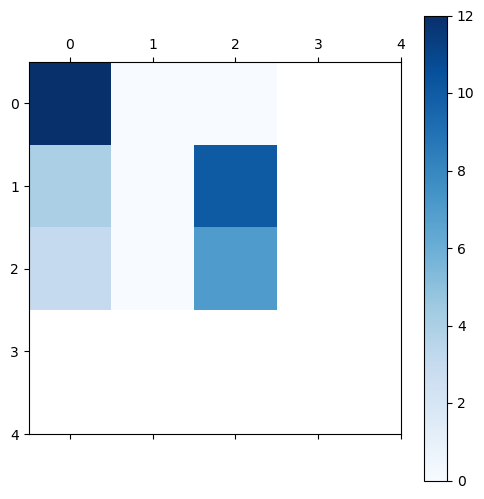

In [8]:
#задание
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_wine, load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPRegressor


wine = load_wine()
iris = load_iris()

X_wine, Y_wine = wine.data, wine.target
print('Dataset sizes:', X_wine.shape, Y_wine.shape, '\n')

X_iris, Y_iris = iris.data, iris.target
print('Dataset sizes: ', X_iris.shape, Y_iris.shape, '\n')

X_train, X_test, Y_train, Y_test = train_test_split(X_wine,
                                                    Y_wine,
                                                    train_size=0.80,
                                                    test_size=0.20,
                                                    stratify=Y_wine,
                                                    random_state=123)

print('Train/Test sizes : ', X_train.shape, X_test.shape,
      Y_train.shape, Y_test.shape, '\n')


mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001,
              batch_size='auto', beta_1=0.9,
              beta_2=0.999,      early_stopping=False,
              epsilon=1e-08,     hidden_layer_sizes=(100,),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123,
              shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)
Y_preds = mlp_classifier.predict(X_test)
print(Y_preds[:151], '\n')
print(Y_test[:151], '\n')
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test), '\n')
print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train), '\n')
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    print(conf_mat, '\n')
    fig = plt.figure(figsize=(6, 6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(5), range(5))
    plt.xticks(range(5), range(5))
    plt.colorbar()
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))
print("Loss: ", mlp_classifier.loss_, '\n')
print("Number of Coefs: ", len(mlp_classifier.coefs_), '\n')
print("Number of Intercepts: ", len(mlp_classifier.intercepts_), '\n')
print("Number of Iterations for Which Estimator Ran: ", mlp_classifier.n_iter_, '\n')
print("Name of Output Layer Activation Function: ", mlp_classifier.out_activation_, '\n')
X_train, X_test, Y_train, Y_test = train_test_split(X_iris, Y_iris,
                                                    train_size=0.80,
                                                    test_size=0.20,
                                                    random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, '\n')

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(activation='relu', alpha=0.0001,
             batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False,
             epsilon=1e-08, hidden_layer_sizes=(100,),
             learning_rate='constant', learning_rate_init=0.001,
             max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=123,
             shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Y_preds = mlp_regressor.predict(X_test)
print(Y_preds[:10], '\n')
print(Y_test[:10], '\n')

print('Test R^2 Score: %.3f'%mlp_regressor.score(X_test, Y_test), '\n')
print('Training R^2 Score: %.3f'%mlp_regressor.score(X_train, Y_train), '\n')
print("Loss: ", mlp_regressor.loss_, '\n')
print("Number of Coefs: ", len(mlp_regressor.coefs_), '\n')
print("Number of Intercepts: ", len(mlp_regressor.intercepts_), '\n')
print("Number of Iterations for Which Estimator Ran: ", mlp_regressor.n_iter_, '\n')
print("Name of Output Layer Activation Function: ", mlp_regressor.out_activation_, '\n')

plt.show()